In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import networkx as nx
from networkx.algorithms import community

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('~/Downloads/OnlineLearning_3.csv')

/home/davidlemay/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.set_index(df['user_id'])

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,stripped_text
user_id,,,,,,,,,,,,,,,,,,,,,
379396636,379396636,1249556830210215938,2020-04-13T04:35:38Z,acikgozy,Many people think this experience will show th...,Twitter Web App,278,NaN,NaN,NaN,...,585,2011-09-24T22:01:25Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/37939663...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1246661038...,Many people think this experience will show th...
1069416997530742784,1069416997530742784,1249556785196916737,2020-04-13T04:35:27Z,sharuna87,Need help with an assignment ASAP? Try #Google...,IFTTT,103,NaN,NaN,NaN,...,589,2018-12-03T02:24:15Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10694169...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1070224710...,Need help with an assignment ASAP? Try #Google...
1069416997530742784,1069416997530742784,1246968449470955520,2020-04-06T01:10:20Z,sharuna87,Being able to detect bias and flawed reasoning...,IFTTT,149,NaN,NaN,NaN,...,589,2018-12-03T02:24:15Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10694169...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1070224710...,Being able to detect bias and flawed reasoning...
1069416997530742784,1069416997530742784,1248139106577719297,2020-04-09T06:42:06Z,sharuna87,A new trend is being seen in online classes — ...,IFTTT,105,NaN,NaN,NaN,...,589,2018-12-03T02:24:15Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10694169...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1070224710...,A new trend is being seen in online classes — ...
1069416997530742784,1069416997530742784,1247059045590224902,2020-04-06T07:10:20Z,sharuna87,Can you tell if an online degree programme is ...,IFTTT,110,NaN,NaN,NaN,...,589,2018-12-03T02:24:15Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10694169...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1070224710...,Can you tell if an online degree programme is ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053289660691156993,1053289660691156993,1246757940108963840,2020-04-05T11:13:51Z,WCPSSEngageComm,Remember to show GRACE for yourself &amp; stud...,Twitter for iPhone,266,NaN,NaN,NaN,...,412,2018-10-19T14:19:59Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10532896...,NaN,http://pbs.twimg.com/profile_images/1053293206...,Remember to show GRACE for yourself &; student...
1237830989486817281,1237830989486817281,1246756491979153409,2020-04-05T11:08:05Z,PeterjWhitfield,Any chance anyone can give some advice on how ...,Twitter for Android,196,NaN,NaN,NaN,...,23,2020-03-11T20:01:35Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/12378309...,NaN,http://pbs.twimg.com/profile_images/1237947104...,Any chance anyone can give some advice on how ...
398897962,398897962,1246755871213916163,2020-04-05T11:05:37Z,__fxckYOUUUU,Any online learning material i can access ? Pr...,Twitter for iPhone,193,NaN,NaN,NaN,...,1128,2011-10-26T18:10:39Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/39889796...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1239615271...,Any online learning material i can access ? Pr...


In [7]:
adj_matrix = pd.crosstab(df['user_id'].dropna().astype(int),df['reply_to_user_id'].dropna().astype(int))

In [8]:
idx = adj_matrix.columns.union(adj_matrix.index)
adj_matrix = adj_matrix.reindex(index = idx, columns=idx, fill_value=0)

In [9]:
graph = nx.from_pandas_adjacency(adj_matrix,create_using=nx.path_graph(10))

In [10]:
np.array(list(nx.average_neighbor_degree(graph).values())).mean()

1.388298918387414

In [11]:
nx.number_connected_components(graph)

367

In [12]:
nx.local_efficiency(graph)

0.009882005899705015

In [13]:
nx.global_efficiency(graph)

0.0016495790178487149

In [14]:
nx.degree_histogram(graph)

[0, 531, 130, 11, 2, 1, 1, 0, 1, 1]

In [15]:
nx.density(graph)

0.0018736138525422327

In [16]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 678\nNumber of edges: 430\nAverage degree:   1.2684'

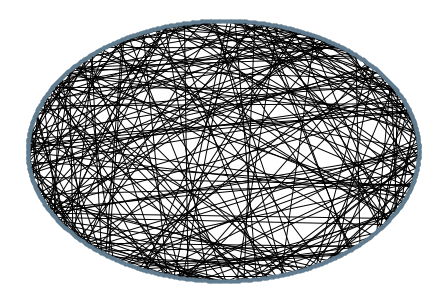

In [17]:
nx.draw_circular(graph,node_size=10,node_color='#607c8e')

Community analysis using Girvan-Newman Algorithm

In [18]:
comp = community.girvan_newman(graph)

In [19]:
communities = list(sorted(c) for c in next(comp))

In [20]:
sorted_communities = sorted(communities,key=len,reverse=True)

In [21]:
communities_distr = [len(x) for x in sorted_communities]

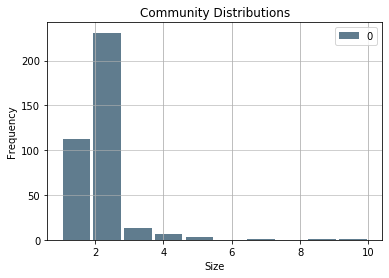

In [22]:
pd.DataFrame(communities_distr).plot.hist(grid=True, rwidth=0.9, color='#607c8e')
plt.title('Community Distributions')
plt.xlabel('Size')
plt.grid(axis='y', alpha=0.75)